# **Breast Cancer Classification with Supervised Learning**

This notebook implements and comprass different supervised learning algorithms on the breast cancer dataset from scikit-learn

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [6]:
# Load the dataset
# The dataset is loaded and convert it into a Pandas DataFrame for better manipulation and visualization.

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [8]:
# Check for missing values
# Missing values can affect model training.

print("Missing values:", df.isnull().sum())

Missing values: mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:
# Feature Scaling
# The dataset contains features with different ranges and magnitudes, which can negatively impact the models.
# This helps ensure that features contribute equally to model training rather than being dominated by large values.

scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['target']))
y = df['target']

In [12]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 1.Logistic Regression: A statistical model that predicts the probability of an instance belonging to a class using a sigmoid function.
  #Works well for binary classification problems like this (Malignant vs. Benign).

# 2.Decision Tree: A non-linear model that splits the dataset into smaller subsets using if-else conditions based on feature values.
  #Handles non-linear relationships well.

#3.Random Forest: An ensemble learning method that builds multiple decision trees and aggregates their predictions. 
  #Reduces overfitting and Handles missing and noisy data well.

#4.Support Vector Machine: Finds the optimal hyperplane that maximally separates classes.
  # Works well on high-dimensional data,  Effective for binary classification (like Malignant vs. Benign).

#5.A non-parametric model that classifies a new data point based on the majority vote of its k nearest neighbors.
  #Can capture complex decision boundaries, Works well when data is well-distributed and has distinguishable patterns.

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-NN": KNeighborsClassifier()
}

In [16]:
# Train and evaluate models
metrics_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
    }
    
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

metrics_df = pd.DataFrame(metrics_results).T 


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   ma

<Figure size 1200x600 with 0 Axes>

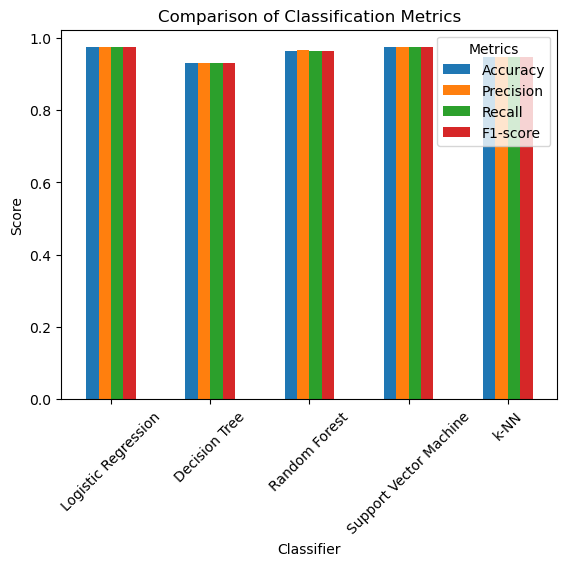

In [17]:
# Plot multiple metrics
plt.figure(figsize=(12, 6))
metrics_df.plot(kind="bar")
plt.title("Comparison of Classification Metrics")
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

In [20]:
# Best and worst performing models
best_model = metrics_df['Accuracy'].idxmax()
worst_model = metrics_df['Accuracy'].idxmin()

print(f"\nBest Performing Model: {best_model} with Accuracy: {metrics_df.loc[best_model, 'Accuracy']:.2f}")
print(f"Worst Performing Model: {worst_model} with Accuracy: {metrics_df.loc[worst_model, 'Accuracy']:.2f}")


Best Performing Model: Logistic Regression with Accuracy: 0.97
Worst Performing Model: Decision Tree with Accuracy: 0.93


In [22]:
#Logistic Regression is the best performing model as it has the highest Accuracy: 0.97

#Logistic Regression Works Well with Standardized Features

In [24]:
# All models performed well, with accuracy above 93%.
# Random Forest and SVM also performed close to Logistic Regression.
# Decision Tree performed the worst.
# k-NN performed slightly lower 